In [1]:
## projet présenté porte sur le sujet 2 de scraping du site imb, à cet effet je vous mettez ici le lien github du projet complet, le sujet de scaping de données est le numéro 2.
## https://github.com/amoungui/my_scrapping_project/tree/master
https://github.com/amoungui/my_scrapping_project/tree/master

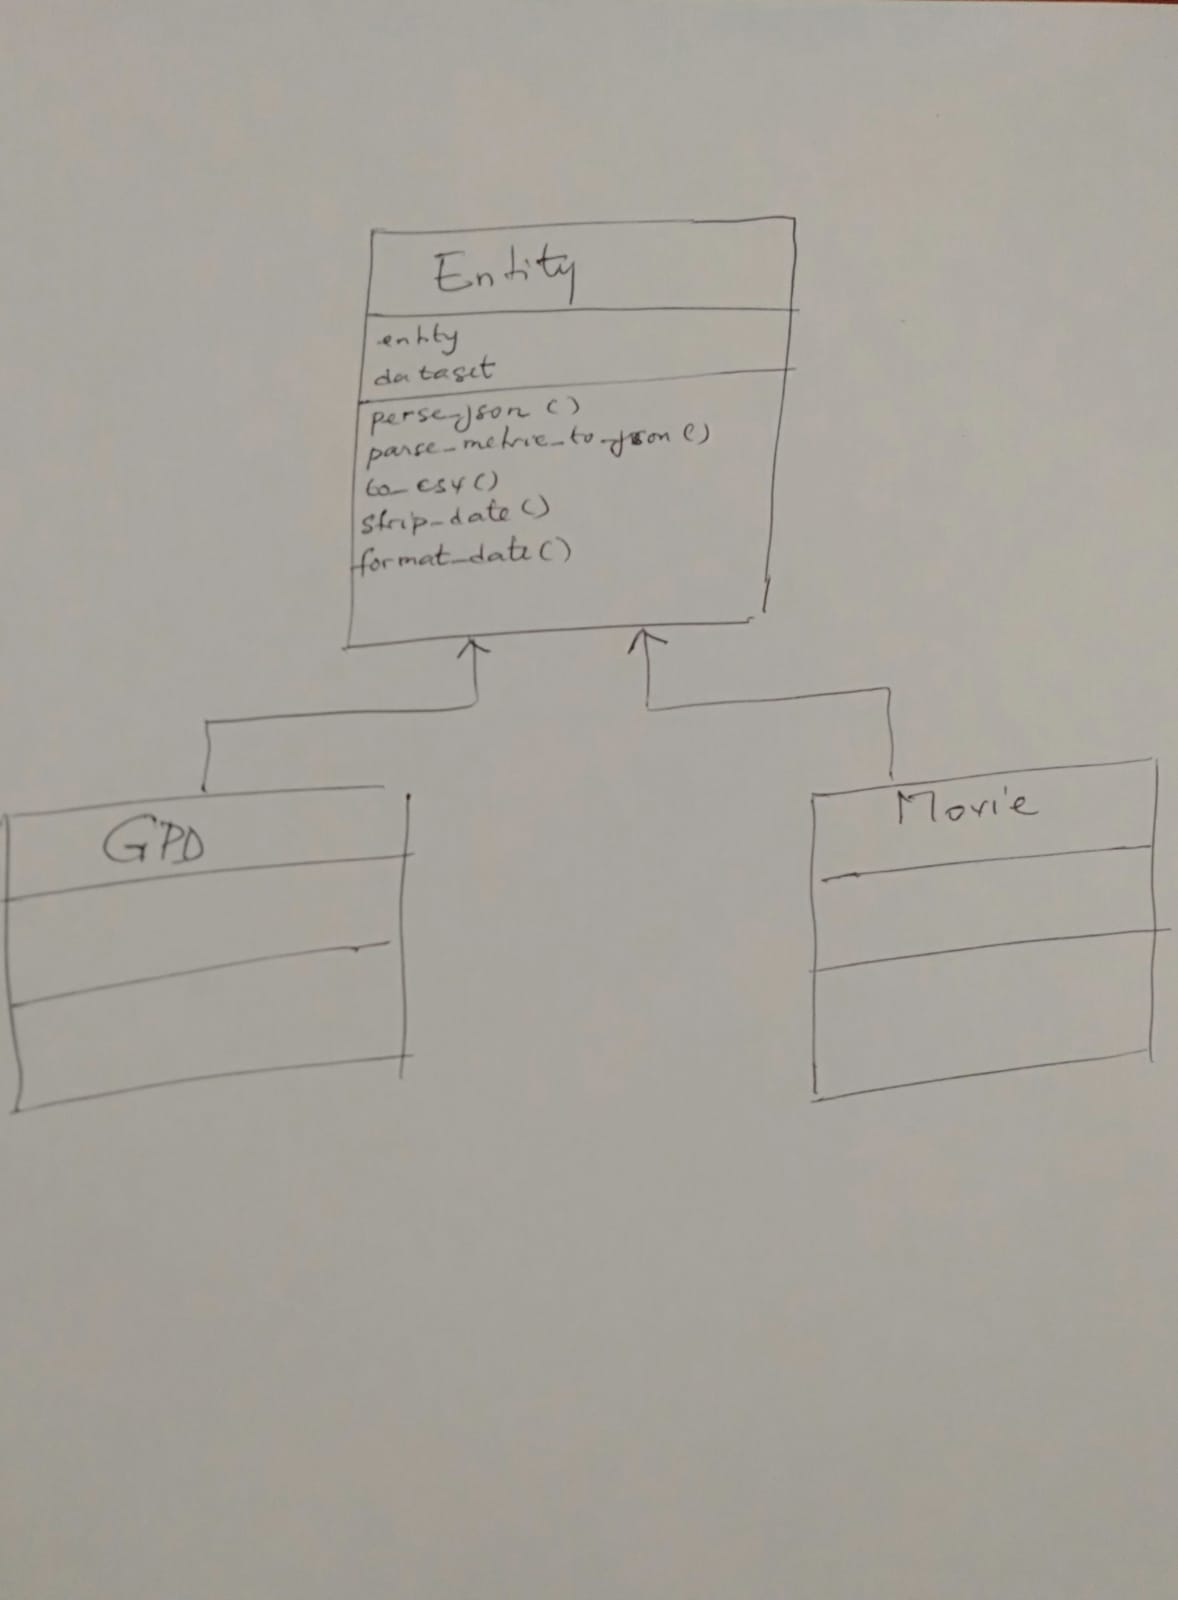

In [4]:
from IPython.display import Image
Image("img/diagrame_de_classes.jpeg", width=50, height=50)

In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv("data/dataset.csv")

In [118]:
len(df)#df.head(5) #

37

In [ ]:
# Avant tout chose nous devons formater les données du dataset

In [119]:
# formatage sur les date car il y a des films qui n'ont pas de date de sortie
def format(x):
    if 'xxx' in x :
        return '2000-01-01'
    if 'xxx' not in x :
        return x
df['release date'] = df['release date'].apply(lambda x: format(x))        

In [120]:
# convertion des montant car il y en a des films qui n'ont de budget en RI 
def convert_(x):
    if x in 'xxx' or 'INR' in x:
        return 1

    else:
        return float(x) # INR56300000            

In [121]:
df['Cumulate Worldwide Gross en $'] = df['Cumulate Worldwide Gross en $'].apply(lambda x: convert_(x))

In [122]:
df['budget en $'] = df['budget en $'].apply(lambda x: convert_(x))

In [38]:
## 1. Distribution des films par catégorie 

In [123]:
data1 = df
data1 = data1.set_index('type')
data1.groupby('type')['title'].apply(lambda x: x)

type
Comedy; Drama                                         Hababam Sinifi
Comedy; Drama                            Maratonci trce pocasni krug
Comedy; Drama                                       Balkanski spijun
Drama                                                     Les Évadés
Drama                                                Soorarai Pottru
Drama                                                        Peranbu
Drama                                              C/o Kancharapalem
Drama                                              Pariyerum Perumal
Drama                                                     Fight Club
Crime; Mystery;                                             Aynabaji
Crime; Drama                                              Le parrain
Crime; Drama                                 Le parrain, 2ème partie
Crime; Drama                                     12 Hommes en colère
Crime; Drama                                            Pulp Fiction
Drama; History               

In [124]:
## 2. Top 50 des budgets des films
data2 = df
data2[['budget en $', 'title']].sort_values('budget en $', ascending=False).head(50)

,budget en $,title
10,1.850000e+08,The Dark Knight : Le Chevalier noir
27,1.600000e+08,Inception
18,9.400000e+07,Le Seigneur des anneaux : Le Retour du roi
33,9.300000e+07,Le Seigneur des anneaux : La Communauté de l'a...
32,6.300000e+07,Fight Club
34,5.500000e+07,Forrest Gump
1,2.500000e+07,Les Évadés
20,2.200000e+07,La liste de Schindler
14,1.300000e+07,"Le parrain, 2ème partie"
19,8.000000e+06,Pulp Fiction


In [33]:
## 3. Nombre de films sortie par décennie

In [125]:
df['release date'] = pd.to_datetime(df['release date'])
data3 = df.set_index('release date')
data3.groupby((data3.index.year//10)*10).sum()

,rating,vote,reviews,budget en $,Cumulate Worldwide Gross en $
release date,,,,,
1950,9.0,706419,1792,3.500000e+05,9.550000e+02
1960,17.6,705945,1209,1.200001e+06,2.525375e+07
1970,80.9,2957444,5677,1.900001e+07,2.941568e+08
1980,35.6,46481,95,4.000000e+00,1.810040e+05
1990,44.7,9240611,20876,1.730000e+08,1.344343e+09
2000,26.7,5724044,16762,3.720000e+08,3.049695e+09
2010,98.2,2208269,5405,1.620351e+08,8.420345e+08
2020,17.9,104059,2916,2.060878e+06,2.000000e+00


In [59]:
## 4 Top 20 films ayant générés le plus de revenu, le moins de revenu.

In [60]:
## 4.1. Top 20 films ayant générés le plus de revenu.

In [126]:
data4 = df
data4[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).head(10)

,title,Cumulate Worldwide Gross en $
18,Le Seigneur des anneaux : Le Retour du roi,1.146031e+09
10,The Dark Knight : Le Chevalier noir,1.005974e+09
33,Le Seigneur des anneaux : La Communauté de l'a...,8.976901e+08
27,Inception,8.368370e+08
34,Forrest Gump,6.782261e+08
20,La liste de Schindler,3.221612e+08
3,Le parrain,2.461210e+08
19,Pulp Fiction,2.139288e+08
32,Fight Club,1.012097e+08
14,"Le parrain, 2ème partie",4.803578e+07


In [38]:
## 4.2. Top 20 films ayant générés le moins de revenu.

In [127]:
data5 = df
data5[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).tail(5)

,title,Cumulate Worldwide Gross en $
7,Aloko Udapadi,1.0
6,C/o Kancharapalem,1.0
4,Soorarai Pottru,1.0
2,Aynabaji,1.0
36,La condition de l'homme: La prière du soldat,1.0


In [40]:
## 5. Analyse de la popularité des films en fonction de leurs budgets

In [128]:
data6 = df
data6 = data4.set_index('budget en $')
data6.groupby(by='budget en $', axis=0, sort=True)[['title', 'vote']].apply(lambda x: x).sort_values('budget en $', ascending=False)

,title,vote
budget en $,,
1.850000e+08,The Dark Knight : Le Chevalier noir,2357045
1.600000e+08,Inception,2115047
9.400000e+07,Le Seigneur des anneaux : Le Retour du roi,1673126
9.300000e+07,Le Seigneur des anneaux : La Communauté de l'a...,1693873
6.300000e+07,Fight Club,1893047
5.500000e+07,Forrest Gump,1852259
2.500000e+07,Les Évadés,2395359
2.200000e+07,La liste de Schindler,1236730
1.300000e+07,"Le parrain, 2ème partie",1153446


In [ ]:
## 6. Distribution des revenus générés par genre de film

In [129]:
data7 = df
data7 = data7.set_index('type')
data7.groupby(by='type')[['title', 'gross en $']].apply(lambda x: x).sort_values('gross en $', ascending=True)

,title,gross en $
type,,
Crime; Drama,Pulp Fiction,107928762
Crime; Drama,Le parrain,134966411
Action; Drama,Kireedam,181001
Western,"Le Bon, la brute, le truand",25100000
Drama,Les Évadés,28699976
Action; Adventu,Inception,292576195
Action; Adventu,Le Seigneur des anneaux : La Communauté de l'a...,315710750
Drama; Romance,Forrest Gump,330455270
Drama,Peranbu,3417


In [ ]:
## 7. Top 10 des films par retour sur investissement

In [130]:
data8 = df
data8['roi'] = data8['budget en $']/data8['Cumulate Worldwide Gross en $']

In [131]:
data8['roi'].sort_values()

25    2.246443e-07
26    1.347702e-06
31    5.524831e-06
8     1.579779e-03
3     2.437825e-02
19    3.739563e-02
35    4.751769e-02
20    6.828879e-02
34    8.109390e-02
18    8.202222e-02
33    1.035992e-01
10    1.839014e-01
27    1.911961e-01
14    2.706316e-01
32    6.224700e-01
1     8.675347e-01
29    1.000000e+00
30    1.000000e+00
24    1.000000e+00
23    1.000000e+00
28    1.000000e+00
22    1.000000e+00
0     1.000000e+00
17    1.000000e+00
16    1.000000e+00
13    1.000000e+00
12    1.000000e+00
11    1.000000e+00
9     1.000000e+00
6     1.000000e+00
21    1.000000e+00
36    1.000000e+00
5     2.814582e+02
15    3.664921e+02
2     4.130155e+05
7     6.603062e+05
4     2.060877e+06
Name: roi, dtype: float64

In [45]:
## 8. Note moyenne par année de sortie de film

In [132]:
data9 = df
data9 = data9.set_index('release date')
data9.groupby(by=data9.index.year, axis=0, sort=True)[['title', 'rating']].sum().sort_values('rating', ascending=False)

,rating
release date,
1976,26.8
2011,26.6
1977,26.6
1994,26.6
1975,18.3
2016,18.2
1982,17.9
2018,17.8
2010,17.6


In [71]:
## Mes propositions d'analyse du dataset

In [72]:
## 9. calculer le ration des budgets des films sorties par pays par année

In [133]:
def convert_int(x):
    if x in 'xxx':
        return 0
    else:
        return float(x) # .replace('.', '')

In [134]:
data10 = df
data10.pivot_table(values='budget en $', index='release date', columns='release country')

release country,Arabia,Bangladesh,Germany,India,Japan,Lanka,Turkey,UK,USA,Yugoslavia
release date,,,,,,,,,,
1957-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,NaN
1961-01-28,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1968-03-08,NaN,NaN,1200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN
1975-04-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1975-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000000.0,NaN
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1977-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
## 10. Determiner le score et types de film produit par auteur(writter) 

In [135]:
data11 = df
data11['score'] = data11['score'].apply(lambda x: convert_int(x))
data_pivot = data11.pivot_table(values='score', index='writter', columns='type')
data_pivot

type,Action; Adventu,Action; Crime;,Action; Drama,Adventure; Come,Biography; Dram,Comedy,Comedy; Crime;,Comedy; Drama,Comedy; Drama;,Comedy; Family;,...,Crime; Drama,Crime; Drama; T,Crime; Mystery;,Drama,Drama; Family,Drama; History,Drama; History;,Drama; Music; M,Drama; Romance,Western
writter,,,,,,,,,,,,,,,,,,,,,
A.K. Lohithadas,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abhijeet Shirish Deshpande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Alain Boublil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Christopher Nolan,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chuck Palahniuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN
Dusan Kovacevic,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fen Tian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Francis Ford Coppola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H.A.L. Craig,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
## 11. determination du nombre de vote total que chaque compositeur (Writter) a pu avoir dans toute sa carrière de cinéaste
data_pivot.sum(axis=1)

writter
A.K. Lohithadas                 0.0
Abhijeet Shirish Deshpande      0.0
Alain Boublil                   0.0
Christopher Nolan              74.0
Chuck Palahniuk                66.0
Dusan Kovacevic                 0.0
Fen Tian                        0.0
Francis Ford Coppola           90.0
H.A.L. Craig                    0.0
J.R.R. Tolkien                 93.0
Jeethu Joseph                   0.0
Jonathan Nolan                 84.0
Luciano Vincenzoni             90.0
Mari Selvaraj                   0.0
Mario Puzo                    100.0
Nazim Hikmet                    0.0
Quentin Tarantino              94.0
Ram                             0.0
Reginald Rose                  96.0
Richard Stilgoe                 0.0
Rifat Ilgaz                     0.0
Sadik Sendil                    0.0
Saman Weeraman                  0.0
Stephen King                   80.0
Sudha Kongara                   0.0
Syed Gaosul Alam Shaon          0.0
Thomas Keneally                94.0
Umur Bugay          

In [ ]:
## représentation du budget de réalisation en fonction du retour sur investissement

C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget en $', ylabel='Cumulate Worldwide Gross en $'>

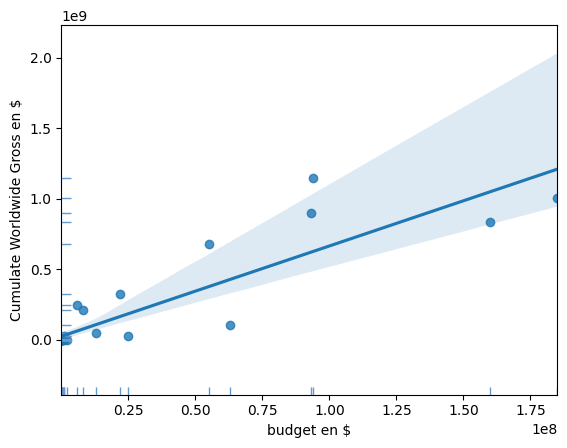

In [137]:
fig, ax = plt.subplots()
sns.regplot(x="budget en $", y="Cumulate Worldwide Gross en $", data=df, ax=ax, lowess=False)  
# adding the small lines to indicate individual data points
sns.rugplot(df["budget en $"].dropna(), axis='x', 
            color="#6699cc", height=0.02, ax=ax)
sns.rugplot(df["Cumulate Worldwide Gross en $"].dropna(), axis='y', 
            color="#6699cc", height=0.02, ax=ax)